# 의도 분류 모델 학습 데이터 생성하기

## 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [2]:
time_expression = pd.read_csv("../dataset/trans-dataset/시간표현탐지데이터.csv")
purpose = pd.read_csv("../dataset/trans-dataset/용도별목적대화데이터.csv")
topic = pd.read_csv("../dataset/trans-dataset/주제별일상대화데이터.csv")
common_sense = pd.read_csv("../dataset/trans-dataset/일반상식.csv")
# add = pd.read_csv("../../변형데이터/추가데이터.csv")

time_expression.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
# add.dropna(inplace=True)

In [3]:
print(f"time_expression shape => {time_expression.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
")
# add => {add.shape}")

time_expression shape => (278781, 1)
purpose shape => (172442, 1)
topic shape => (1445793, 1)
common_sense shape => (68538, 3)



In [4]:
time_expression.columns

Index(['text'], dtype='object')

In [5]:
purpose.columns

Index(['text'], dtype='object')

In [6]:
topic.columns

Index(['text'], dtype='object')

In [7]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [8]:
# add.columns

In [9]:
# all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
# + list(common_sense['answer']) + list(add['query'])

all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer'])

In [10]:
len(all_data)

2034092

In [11]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("../dataset/trans-dataset/통합본데이터.csv", index=False)

## 2. 의도 분류 데이터 생성하기

0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타  
기타는 추후에 다시 생성 예정

In [12]:
number = []
place = []
time = []
etc = []

In [13]:
for i in all_data:
    if ('어디' or '장소' or '위치' or '주소') in i: place.append(i)
    elif ('번호' or '전화') in i: number.append(i)
    elif ('시작' or '마감' or '언제' or '기간' or '시간') in i: time.append(i)
    else: etc.append(i)

In [14]:
len(number)

6937

In [15]:
number_label = []
for _ in range(len(number)):
    number_label.append(0)
len(number_label)

6937

In [16]:
len(place)

21174

In [17]:
place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label)

21174

In [18]:
len(time)

5633

In [19]:
time_label = []
for _ in range(len(time)):
    time_label.append(2)
len(time_label)

5633

In [20]:
#import random
#random.seed(42)
#etc_sample = random.sample(etc, 20000)

In [21]:
#etc_sample_label = []
#for _ in range(len(etc_sample)):
#    etc_sample_label.append(3)
#len(etc_sample_label)

In [22]:
train_df = pd.DataFrame({'text':number+place+time,
                         'label':number_label+place_label+time_label})

In [23]:
train_df.head()

,text,label
0,우측 상단 플러스버튼 클릭 후 열여섯자리 인증번호 입력하시면 됩니다,0
1,왔던 번호로 다시 걸어보라는 거죠,0
2,네 그래서 고객님 쿠폰번호 문자로요,0
3,당첨자에게 등록되어 있는 번호로 문자메시지 발송 드리고 있어요,0
4,네 핸드폰 번호 확인 감사드립니다,0


In [24]:
train_df.tail()

,text,label
33739,"미군과 작전통제권 이양(대한민국의 전시작전권 환수), 한미연합군사훈련, 기지 이전협상 등",2
33740,상륙 이후 시작된 연합군의 연료 부족,2
33741,국제 투기꾼들이 가격을 최대한 올려놓은 다음 팔아버리기 시작한 것,2
33742,'조지프 스미스를 소재로 뭔가 하고 싶다'는 로페즈의 제안에 제작을 시작,2
33743,쥐라기 때부터 네바다 주 중앙의 지층파괴지대 동쪽에서 지각이 불안정해지기 시작,2


In [25]:
train_df[train_df['label']==0]

,text,label
0,우측 상단 플러스버튼 클릭 후 열여섯자리 인증번호 입력하시면 됩니다,0
1,왔던 번호로 다시 걸어보라는 거죠,0
2,네 그래서 고객님 쿠폰번호 문자로요,0
3,당첨자에게 등록되어 있는 번호로 문자메시지 발송 드리고 있어요,0
4,네 핸드폰 번호 확인 감사드립니다,0
...,...,...
6932,"화학 원소로 기호는 Ag(←), 원자 번호는 47",0
6933,등번호 ‘1’번,0
6934,전화번호 검색과 지도서비스,0
6935,현을 구멍의 번호에 따라 나누면 화음을 제공한다는 사실,0


In [26]:
train_df[train_df['label']==1]

,text,label
6937,그 스탬프를 모으면요 어디서 어떻게 사용하나요,1
6938,네 어디서 전화 주신건가요,1
6939,어디에서나 빛나는 주얼리 브랜드 #@소속# 고객센터 입니다,1
6940,이벤트 당첨 확인은 어디서 하나요,1
6941,아 어디서 볼 수 있는 건가요,1
...,...,...
28106,"자체적으로 확립한 고유의 세계관 안에서 국가, 전쟁, 인물상 등을 묘사하며, '모빌...",1
28107,현재로서 왕가수라는 곳이 어디인지는 알 수 없다.,1
28108,재즈풍의 발라드곡 '너는 어디에 나는 여기에',1
28109,현재로서 왕가수라는 곳이 어디인지는 알 수 없다.,1


In [27]:
train_df[train_df['label']==2]

,text,label
28111,시작일,2
28112,연애 시작,2
28113,시작,2
28114,시작,2
28115,시작,2
...,...,...
33739,"미군과 작전통제권 이양(대한민국의 전시작전권 환수), 한미연합군사훈련, 기지 이전협상 등",2
33740,상륙 이후 시작된 연합군의 연료 부족,2
33741,국제 투기꾼들이 가격을 최대한 올려놓은 다음 팔아버리기 시작한 것,2
33742,'조지프 스미스를 소재로 뭔가 하고 싶다'는 로페즈의 제안에 제작을 시작,2


In [28]:
#train_df[train_df['label']==3]

In [29]:
train_df.reset_index(drop=True, inplace=True)

In [30]:
train_df.tail()

,text,label
33739,"미군과 작전통제권 이양(대한민국의 전시작전권 환수), 한미연합군사훈련, 기지 이전협상 등",2
33740,상륙 이후 시작된 연합군의 연료 부족,2
33741,국제 투기꾼들이 가격을 최대한 올려놓은 다음 팔아버리기 시작한 것,2
33742,'조지프 스미스를 소재로 뭔가 하고 싶다'는 로페즈의 제안에 제작을 시작,2
33743,쥐라기 때부터 네바다 주 중앙의 지층파괴지대 동쪽에서 지각이 불안정해지기 시작,2


In [31]:
train_df.to_csv("train_data.csv", index=False)

## 3. 적절한 패딩 길이 구하기

In [32]:
data = pd.read_csv('train_data.csv')

In [33]:
data.shape

(33744, 2)

In [34]:
tokenizer = Komoran()

In [35]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [36]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 6.595424371740161
토큰 길이 최대: 54
토큰 길이 표준편차: 3.0920020908649732


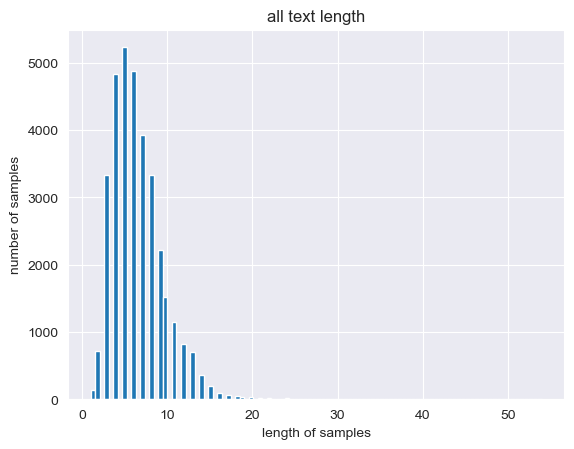

In [37]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9991405879563774
